In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
# 讀取目錄底下所有檔案絕對路徑
paths_PSPI_for_painful_image = subprocess.getoutput('find "/tmp/Frame_Labels/PSPI/" -type f').split('\n')

In [3]:
# 取出檔案名稱
list_pain_img_name = [
    img_path.split(sep='_facs.txt')[0].split(sep='/')[-1]
    for img_path in paths_PSPI_for_painful_image]
print("{}, {}, len = {}".format(list_pain_img_name[0], list_pain_img_name[-1], len(list_pain_img_name)))

dr052t1aiaff138, mg066t1aeaff149, len = 48398


In [4]:
# 取出檔案分數
list_pain_img_score = [
    int(float(open(img_path).readline().replace("\n","").format('f')))
    for img_path in paths_PSPI_for_painful_image]
print("len = {}".format(len(list_pain_img_score)))

len = 48398


In [11]:
# 檢查不同資料夾下的檔案名稱是否發生碰撞
assert len(list_pain_img_name) == len(set(list_pain_img_name)), '檔案名稱有重複'

In [12]:
## 合併兩個 list 建立對應表
df_UNBC_pain_score = pd.DataFrame({'file_name':list_pain_img_name,
                                   'PSPI':list_pain_img_score})

In [100]:
df_UNBC_pain_score[
    df_UNBC_pain_score['PSPI'] >= 1
].index.size

8369

### ~~這邊繪圖犯的錯~~
~~根據文件顯示，hist 的 range 參數是用來設定上下線忽略 outliner。
用來設定圖表 score 應該是 bottom~~

count    48398.000000
mean         0.446981
std          1.302021
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: PSPI, dtype: float64


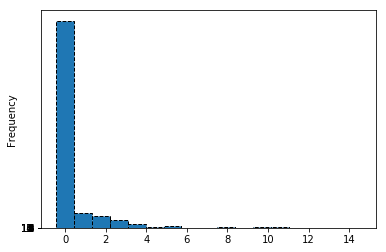

In [96]:
print(df_UNBC_pain_score['PSPI'].describe())
df_UNBC_pain_score['PSPI'].plot.hist(
    align = 'left',
    ls = 'dashed',
    lw = 1,
    edgecolor = 'black',
    bins = 17,
    yticks = range(16) 
)
# plt.gca().set_yscale("log")
plt.show()

In [104]:
# df_UNBC_pain_score.set_index(keys='file_name').to_csv("UNBC_pain_score_table.csv")

In [106]:
pd.read_csv("UNBC_pain_score_table.csv").index.size

48398